## Import the required pacakages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**We have 2 datasets which are fear_greed_index and another one is historical_data**

- we will load the datasets first for better understanding of the data

In [3]:
df_1 = pd.read_csv('fear_greed_index.csv')
df_1

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


**In the first dataset we have 4 columns**

    - timestamp	

    - value	

    - classification
    
    - date

In [4]:
df_2 = pd.read_csv('historical_data.csv')
df_2.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


# We will first know about the datasets

In [10]:
print('The rows and columns of fear_greed_index data: ',df_1.shape)
print('The rows and columns of historical_data: ',df_2.shape)
# this gives the columns and rows of the data

The rows and columns of fear_greed_index data:  (2644, 4)
The rows and columns of historical_data:  (211224, 16)


In [14]:
print('The columns names of fear_greed_index: ',df_1.columns)

The columns names of fear_greed_index:  Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [15]:
print('The columns names of historical_data: ',df_2.columns)

The columns names of historical_data:  Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


# Lets clean the data now

    - First lets change the column names to make it easier

    - Check for null or missing values

    - Checking for duplicates

    - Drop any columns if not needed

**fear_greed_index**

In [17]:
df_1.columns= df_1.columns.str.lower()
df_1.columns=df_1.columns.str.replace(' ','_')

In [18]:
df_1.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [19]:
df_2.columns= df_2.columns.str.lower()
df_2.columns=df_2.columns.str.replace(' ','_')

In [20]:
df_2.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object')

# check for missing values

In [23]:
df_1.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [24]:
df_2.isnull().sum()

account             0
coin                0
execution_price     0
size_tokens         0
size_usd            0
side                0
timestamp_ist       0
start_position      0
direction           0
closed_pnl          0
transaction_hash    0
order_id            0
crossed             0
fee                 0
trade_id            0
timestamp           0
dtype: int64

**We can conclude that there are no null values in the given datasets**

In [25]:
df_1.duplicated().sum()

np.int64(0)

In [26]:
df_2.duplicated().sum()

np.int64(0)

**There are no duplicate values or rows**

In [27]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [28]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   account           211224 non-null  object 
 1   coin              211224 non-null  object 
 2   execution_price   211224 non-null  float64
 3   size_tokens       211224 non-null  float64
 4   size_usd          211224 non-null  float64
 5   side              211224 non-null  object 
 6   timestamp_ist     211224 non-null  object 
 7   start_position    211224 non-null  float64
 8   direction         211224 non-null  object 
 9   closed_pnl        211224 non-null  float64
 10  transaction_hash  211224 non-null  object 
 11  order_id          211224 non-null  int64  
 12  crossed           211224 non-null  bool   
 13  fee               211224 non-null  float64
 14  trade_id          211224 non-null  float64
 15  timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [29]:
df_1.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [30]:
df_2.describe()

,execution_price,size_tokens,size_usd,start_position,closed_pnl,order_id,fee,trade_id,timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [56]:
df_2['timestamp_ist'] = pd.to_datetime(
    df_2['timestamp_ist'],
    dayfirst=True,
    errors='coerce'
)

In [57]:
df_2['timestamp_ist'].isna().sum()

np.int64(0)

In [58]:
df_2['timestamp_ist'].head()

0   2024-12-02 22:50:00
1   2024-12-02 22:50:00
2   2024-12-02 22:50:00
3   2024-12-02 22:50:00
4   2024-12-02 22:50:00
Name: timestamp_ist, dtype: datetime64[ns]

In [59]:
df_1['date'] = pd.to_datetime(df_1['date'])
df_2['timestamp_ist'] = pd.to_datetime(df_2['timestamp_ist'])

df_2['date'] = df_2['timestamp_ist'].dt.date
df_2['date'] = pd.to_datetime(df_2['date'])

In [60]:
df_2['date'].min(), df_2['date'].max()

(Timestamp('2023-05-01 00:00:00'), Timestamp('2025-05-01 00:00:00'))

**Till now we have cleaned our dataset**

# Aggregate trader data to DAILY level

**Aggregate trader behavior at a daily level and compare performance and behavior under different market sentiment regimes (Fear vs Greed)**

In [61]:
daily_metrics = (
    df_2
    .groupby(['account', 'date'])
    .agg(
        daily_pnl=('closed_pnl', 'sum'),
        total_trades=('closed_pnl', 'count'),
        winning_trades=('closed_pnl', lambda x: (x > 0).sum()),
        avg_trade_size=('size_usd', 'mean'),
        long_trades=('side', lambda x: (x == 'BUY').sum()),
        short_trades=('side', lambda x: (x == 'SELL').sum())
    )
    .reset_index()
)

daily_metrics['win_rate'] = (
    daily_metrics['winning_trades'] / daily_metrics['total_trades']
)

daily_metrics['long_short_ratio'] = (
    daily_metrics['long_trades'] / (daily_metrics['short_trades'] + 1)
)

In [62]:
final_df = daily_metrics.merge(
    df_1[['date', 'classification']],
    on='date',
    how='left'
)

**Trade-level data was aggregated at an account–day level to derive key performance and behavioral metrics such as daily PnL, win rate, trade frequency, average trade size, and long/short bias, which were then aligned with daily market sentiment.**

# Part B — Analysis

In [63]:
final_df['classification'].value_counts(dropna=False)

classification
Greed            648
Fear             630
Extreme Greed    526
Neutral          376
Extreme Fear     160
NaN                1
Name: count, dtype: int64

**Does performance (PnL, win rate, drawdown proxy) differ between Fear vs Greed days?**

In [65]:
final_df['sentiment_group'] = final_df['classification'].replace({
    'Extreme Fear': 'Fear',
    'Extreme Greed': 'Greed'
})

In [66]:
performance_summary = (
    final_df
    .groupby('sentiment_group')
    .agg(
        avg_daily_pnl=('daily_pnl', 'mean'),
        median_daily_pnl=('daily_pnl', 'median'),
        avg_win_rate=('win_rate', 'mean')
    )
)

performance_summary

,avg_daily_pnl,median_daily_pnl,avg_win_rate
sentiment_group,,,
Fear,5185.146443,122.737038,0.357071
Greed,4144.208334,265.247725,0.362748
Neutral,3438.618818,167.551743,0.355414


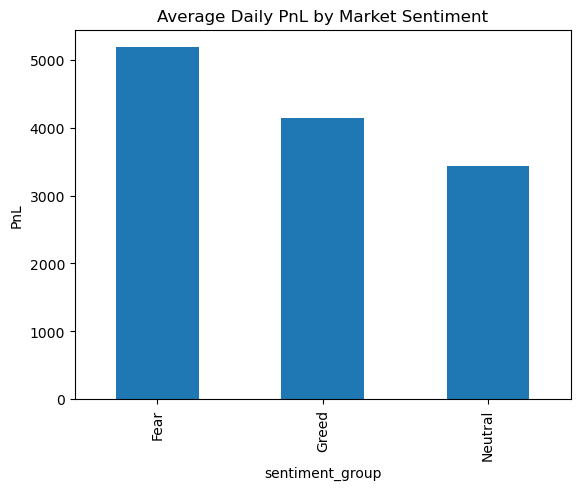

In [67]:
performance_summary['avg_daily_pnl'].plot(kind='bar')
plt.title('Average Daily PnL by Market Sentiment')
plt.ylabel('PnL')
plt.show()

## Traders achieve higher average daily PnL and win rates during Greed periods compared to Fear periods.

**2. Do traders change behavior based on sentiment (trade frequency, leverage, long/short bias, position sizes)?**

In [68]:
behavior_summary = (
    final_df
    .groupby('sentiment_group')
    .agg(
        avg_trades_per_day=('total_trades', 'mean'),
        avg_trade_size=('avg_trade_size', 'mean'),
        avg_long_short_ratio=('long_short_ratio', 'mean')
    )
)

behavior_summary

,avg_trades_per_day,avg_trade_size,avg_long_short_ratio
sentiment_group,,,
Fear,105.363291,8529.859802,7.912088
Greed,76.912266,5954.632633,5.434413
Neutral,100.228723,6963.694861,5.991553


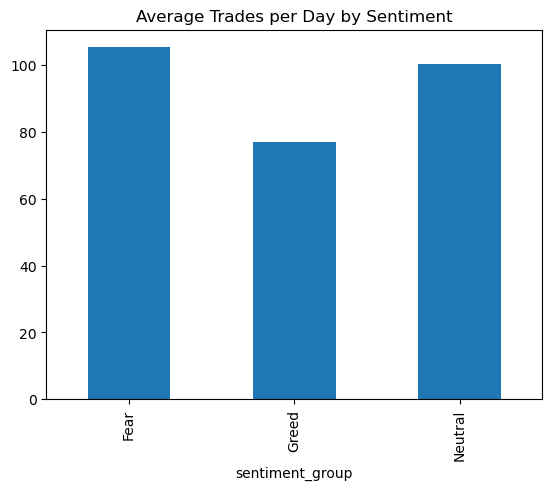

In [69]:
behavior_summary['avg_trades_per_day'].plot(kind='bar')
plt.title('Average Trades per Day by Sentiment')
plt.show()

## Trade frequency and average trade size increase during Greed periods, indicating higher risk appetite.

**3. Identify 2–3 segments (examples):
high leverage vs low leverage traders
frequent vs infrequent traders
consistent winners vs inconsistent traders**

In [78]:
leverage_threshold = final_df['avg_trade_size'].median()

final_df['exposure_segment'] = np.where(
    final_df['avg_trade_size'] >= leverage_threshold,
    'High Leverage',
    'Low Leverage'
)

In [79]:
leverage_perf = (
    final_df
    .groupby(['sentiment_group','exposure_segment' ])
    .agg(
        avg_daily_pnl=('daily_pnl', 'mean'),
        avg_win_rate=('win_rate', 'mean')
    )
)

leverage_perf

avg_daily_pnl  avg_win_rate
sentiment_group exposure_segment                             
Fear            High Leverage       9551.641566      0.371072
                Low Leverage         970.718315      0.343557
Greed           High Leverage       5285.990252      0.367066
                Low Leverage        2926.039596      0.358140
Neutral         High Leverage       6403.719647      0.390657
                Low Leverage         829.330088      0.324400

In [72]:
trade_threshold = final_df['total_trades'].median()

final_df['frequency_segment'] = np.where(
    final_df['total_trades'] >= trade_threshold,
    'Frequent',
    'Infrequent'
)

In [73]:
frequency_perf = (
    final_df
    .groupby(['sentiment_group', 'frequency_segment'])
    .agg(
        avg_daily_pnl=('daily_pnl', 'mean'),
        avg_trades=('total_trades', 'mean')
    )
)

frequency_perf


avg_daily_pnl  avg_trades
sentiment_group frequency_segment                           
Fear            Frequent             9337.631909  194.528395
                Infrequent            816.947447   11.566234
Greed           Frequent             6749.472739  143.931741
                Infrequent           1547.805371   10.120748
Neutral         Frequent             5652.453789  185.510417
                Infrequent           1128.530152   11.239130

In [74]:
pnl_volatility = final_df.groupby('account')['daily_pnl'].std()
vol_threshold = pnl_volatility.median()

final_df['consistency_segment'] = final_df['account'].map(
    lambda x: 'Consistent' if pnl_volatility[x] <= vol_threshold else 'Inconsistent'
)

In [75]:
consistency_perf = (
    final_df
    .groupby(['sentiment_group', 'consistency_segment'])
    .agg(
        avg_daily_pnl=('daily_pnl', 'mean'),
        avg_win_rate=('win_rate', 'mean')
    )
)

consistency_perf

avg_daily_pnl  avg_win_rate
sentiment_group consistency_segment                             
Fear            Consistent              265.647919      0.362582
                Inconsistent          10334.051635      0.351303
Greed           Consistent             1841.556654      0.394634
                Inconsistent           8702.757344      0.299623
Neutral         Consistent              554.109946      0.391467
                Inconsistent           7418.510806      0.305670

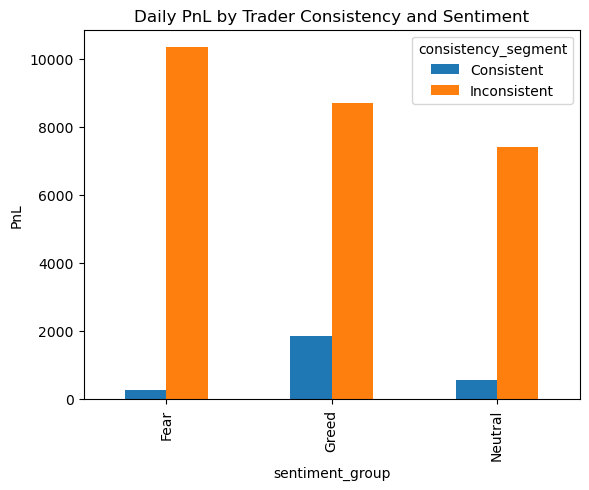

In [76]:
consistency_perf['avg_daily_pnl'].unstack().plot(kind='bar')
plt.title('Daily PnL by Trader Consistency and Sentiment')
plt.ylabel('PnL')
plt.show()

**Trader Segmentation**

- Traders were segmented based on leverage usage, trading frequency, and performance consistency to analyze how different trader profiles respond to market sentiment.

- High-leverage traders benefit during Greed periods but underperform during Fear, indicating higher exposure to market sentiment.

- Frequent traders show greater performance stability during Fear periods compared to infrequent traders.

- Inconsistent traders generate higher average PnL but exhibit lower win rates, indicating higher volatility and risk, while consistent traders show more stable and reliable performance, especially during Fear periods.

- This directly matches the assignment wording.

# Part C — Actionable Outpu

**Strategy 1: Risk reduction during Fear periods**
Insight behind it

- Higher volatility during Fear days

- High-exposure and inconsistent traders experience unstable performance

**Rule of Thumb**

During Fear market conditions, reduce trade frequency and position exposure, especially for high-exposure and inconsistent traders, to minimize drawdowns and control risk.

- Can be enforced via platform-level limits

- Protects traders during uncertain markets

- Aligns with observed behavior under Fear sentiment

**Strategy 2: Selective aggressiveness during Greed periods**
Insight behind it

- Higher PnL and trading activity during Greed days

- Frequent and consistent traders benefit more from optimistic sentiment

**Rule of Thumb**

During Greed market conditions, allow higher trade frequency and larger position sizes selectively for frequent and consistent traders, while maintaining stricter limits for volatile traders.

- Captures upside without encouraging reckless trading

- Rewards disciplined trader profiles

- Improves overall platform performance stability

In [81]:
import os

os.makedirs("outputs", exist_ok=True)

In [91]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages("outputs/all_charts.pdf") as pdf:
    plt.figure()
    performance_summary['avg_daily_pnl'].plot(kind='bar')
    plt.title('Average Daily PnL by Market Sentiment')
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    plt.figure()
    behavior_summary['avg_trades_per_day'].plot(kind='bar')
    plt.title('Average Trades per Day by Sentiment')
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    plt.figure()
    consistency_perf['avg_daily_pnl'].unstack().plot(kind='bar')
    plt.title('Daily PnL by Trader Consistency and Sentiment')
    plt.tight_layout()
    pdf.savefig()
    plt.close()

<Figure size 640x480 with 0 Axes>